In [5]:
import sys
!{sys.executable} -m pip install tensorflow numpy pandas matplotlib scikit-learn nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [6]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')  # Download tokenizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [11]:
def load_reviews(filepath):
    texts = []
    labels = []
    
    with open(filepath, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if len(line) > 2:  # Ensure it's not an empty line
                label = int(line[0])  # First character is the label (0 or 1)
                text = line[2:].strip()  # Extract the actual review text
                
                texts.append(text)
                labels.append(label)

    return texts, labels

# Load dataset
X, y = load_reviews("Dataset/training.txt")


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [17]:
# Tokenize and convert to sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_seq = pad_sequences(X_train_seq, maxlen=100, padding="post", truncating="post")
X_test_seq = pad_sequences(X_test_seq, maxlen=100, padding="post", truncating="post")

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


In [18]:
# Define a simple LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
epochs = 10  # Adjust as needed
history = model.fit(
    X_train_seq, y_train, 
    epochs=epochs, 
    validation_data=(X_test_seq, y_test), 
    verbose=2
)


Epoch 1/10
178/178 - 10s - 56ms/step - accuracy: 0.5640 - loss: 0.6861 - val_accuracy: 0.5585 - val_loss: 0.6865
Epoch 2/10
178/178 - 7s - 40ms/step - accuracy: 0.5651 - loss: 0.6851 - val_accuracy: 0.5585 - val_loss: 0.6875
Epoch 3/10
178/178 - 8s - 47ms/step - accuracy: 0.5651 - loss: 0.6852 - val_accuracy: 0.5585 - val_loss: 0.6864
Epoch 4/10
178/178 - 9s - 50ms/step - accuracy: 0.5651 - loss: 0.6852 - val_accuracy: 0.5585 - val_loss: 0.6863
Epoch 5/10
178/178 - 9s - 49ms/step - accuracy: 0.5651 - loss: 0.6850 - val_accuracy: 0.5585 - val_loss: 0.6866
Epoch 6/10
178/178 - 9s - 50ms/step - accuracy: 0.5651 - loss: 0.6850 - val_accuracy: 0.5585 - val_loss: 0.6863
Epoch 7/10
178/178 - 9s - 48ms/step - accuracy: 0.5651 - loss: 0.6848 - val_accuracy: 0.5585 - val_loss: 0.6863
Epoch 8/10
178/178 - 9s - 51ms/step - accuracy: 0.5651 - loss: 0.6849 - val_accuracy: 0.5585 - val_loss: 0.6865
Epoch 9/10
178/178 - 10s - 55ms/step - accuracy: 0.5651 - loss: 0.6849 - val_accuracy: 0.5585 - val_los

In [22]:
model.save("sentiment_model.h5")


In [23]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [20]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = (model.predict(X_test_seq) > 0.5).astype("int32")


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5580 - loss: 0.6865
Test Accuracy: 0.5585
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


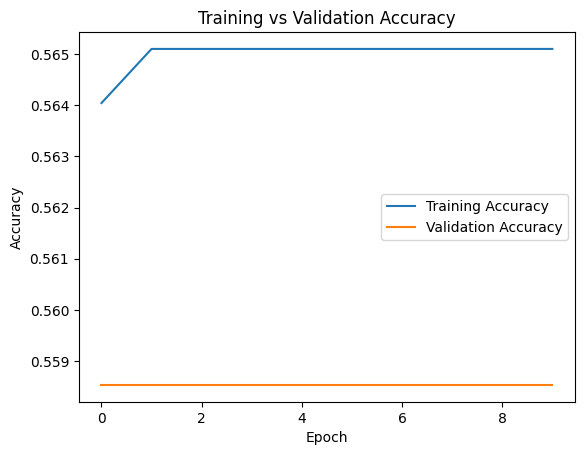

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [24]:
!pip install flask


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip
